- Dữ liệu gốc gồm khoảng 12k trang PDF về việc sao kê tài khoản [xem tại đây](https://www.facebook.com/thongtinchinhphu/posts/959216112909836?rdid=EPKEC1ZRp6J9MTI1)
- Dữ liệu sau khi được xử lí và chia sẻ tại nhóm [AIO Question / Answer and Competition](https://github.com/dauvannam1804/DonationLookupBot/tree/main/data)


In [ ]:
# Tải dữ liệu
!wget https://raw.githubusercontent.com/dauvannam1804/DonationLookupBot/main/data/transactions.csv

--2024-09-14 02:16:07--  https://raw.githubusercontent.com/dauvannam1804/DonationLookupBot/main/data/transactions.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29109969 (28M) [text/plain]
Saving to: ‘transactions.csv’

transactions.csv    100%[===================>]  27.76M   128MB/s    in 0.2s    

2024-09-14 02:16:08 (128 MB/s) - ‘transactions.csv’ saved [29109969/29109969]



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/transactions.csv")

**Date:** Ngày giao dịch <br>
**Amount:** Số tiền giao dịch <br>
**Content:** Nội dung chuyển khoảng <br>
**CT Code:** Mã số chứng thực

In [ ]:
df.head(5)

,Date,Amount,Content,CT Code
0,01/09/2024,50000,NaN,5213.45946
1,01/09/2024,20000,VCB.CTDK.31/03/2024.ADIDA PHAT. CT tu 04810007...,5090.85797
2,01/09/2024,29000,MBVCB.6916176124.CAO VIET TUAN chuyen tien.CT ...,5241.83107
3,01/09/2024,3000,272986.010924.101858.DO DUC LOI chuyen tien,5218.87149
4,01/09/2024,3000,020097040509011046122024JDC5013867.96713 .1046...,5388.96713


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200364 entries, 0 to 200363
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Date     200364 non-null  object
 1   Amount   200364 non-null  int64 
 2   Content  194545 non-null  object
 3   CT Code  200364 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.1+ MB


In [ ]:
df.describe()

,Amount
count,2.003640e+05
mean,6.741839e+05
std,4.697396e+06
min,1.000000e+03
25%,1.000000e+05
50%,2.000000e+05
75%,5.000000e+05
max,1.000000e+09


In [ ]:
df['Amount'].nunique()

3628

In [ ]:
df.Amount.value_counts().head(20)

,count
Amount,
100000,43602
200000,43021
500000,32081
1000000,19626
50000,14857
300000,12808
2000000,4861
20000,2996
10000,2752


**Số lượng giao dịch trong từng ngày từ 01/09/2024 đến 11/09/2024**

In [ ]:
# Chuyển cột "Date" sang kiểu datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [ ]:
df['Date'].head()

,Date
0,2024-09-01
1,2024-09-01
2,2024-09-01
3,2024-09-01
4,2024-09-01


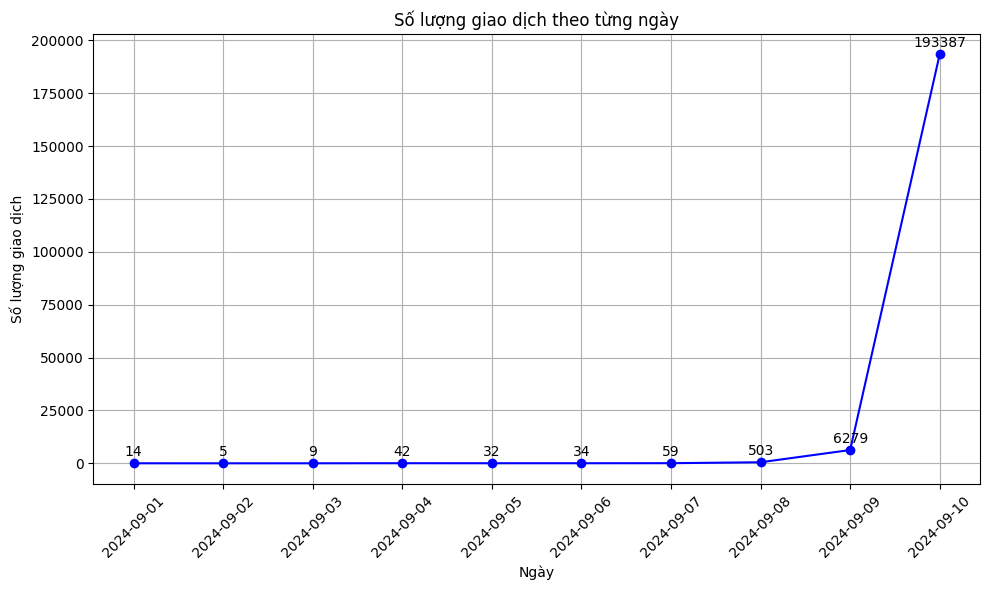

In [ ]:
# Đếm số lượng giao dịch theo từng ngày
daily_transactions = df.groupby(df['Date'].dt.date).size()

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(daily_transactions.index, daily_transactions.values, marker='o', linestyle='-', color='b')

# Thêm số vào các cột mốc
for i, value in enumerate(daily_transactions.values):
    plt.annotate(f'{value}', (daily_transactions.index[i], daily_transactions.values[i]),
                 textcoords="offset points", xytext=(0, 5), ha='center')

# Thêm tiêu đề và nhãn
plt.title('Số lượng giao dịch theo từng ngày')
plt.xlabel('Ngày')
plt.ylabel('Số lượng giao dịch')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

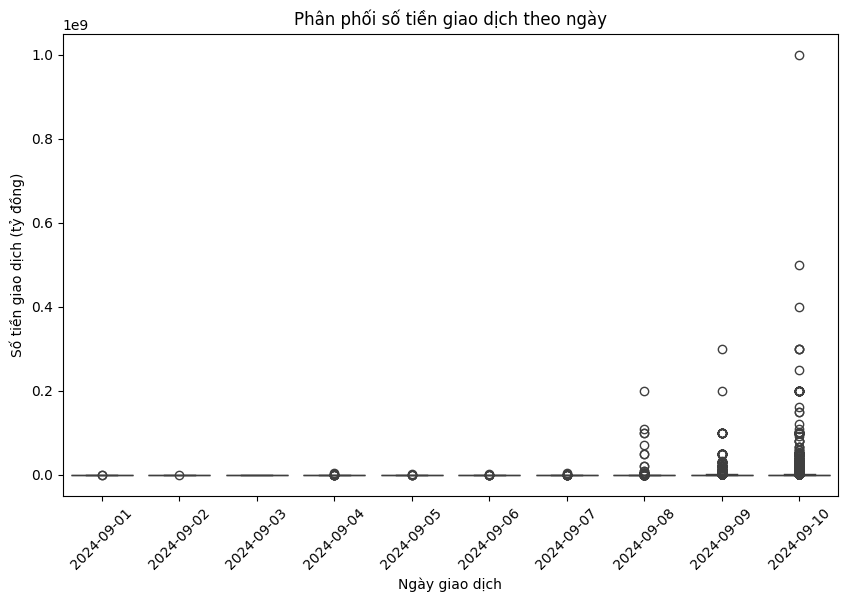

In [ ]:
# Vẽ biểu đồ phân tán
plt.figure(figsize=(10, 6))
sns.boxplot(x='Date', y='Amount', data=df)
plt.title('Phân phối số tiền giao dịch theo ngày')
plt.xlabel('Ngày giao dịch')
plt.ylabel('Số tiền giao dịch (tỷ đồng)')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

- Giao dịch có giá trị cao nhất xảy ra vào ngày 10/09, với giá trị gần 1 tỷ đồng.
- Có sự tăng đột biến về số lượng và giá trị giao dịch trong 3 ngày cuối (08/09, 09/09, 10/09).

**Phân tích nội dung chuyển khoản (Content)**

In [ ]:
from wordcloud import WordCloud

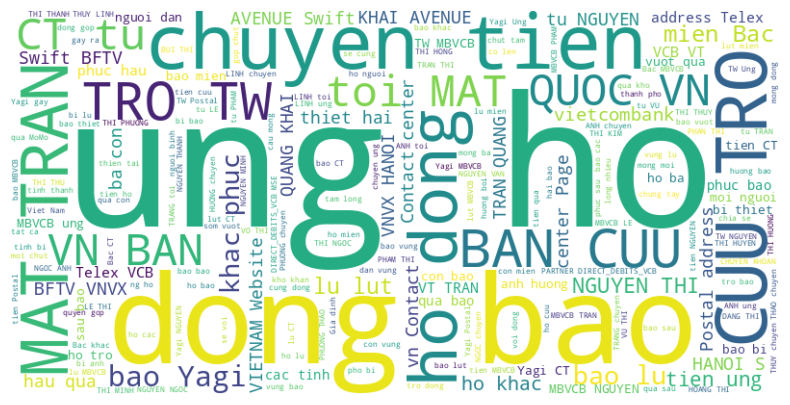

In [ ]:
# Kết hợp tất cả các nội dung thành một chuỗi văn bản
text = ' '.join(df['Content'].astype(str))

# Tạo đối tượng WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Hiển thị biểu đồ WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Tắt hiển thị trục
plt.show()

- **Từ khóa nổi bật nhất:**
"ung", "ho", "dong", "bao": Đây là từ lớn nhất, chiếm vị trí trung tâm, liên quan đến việc ủng hộ đồng bào bị ảnh hưởng bởi bão lũ

- **Nhóm từ liên quan đến ngân hàng và tài chính:**
"CT" (có thể là chuyển tiền, chứng thực), "chuyen tien", "Swift", "Vietcombank", "BFTV", "VCB", "Telex", "TRO" (có thể là trợ lý)
"Quoc te" (quốc tế), "toi" (tới), "tu" (từ), "dong bao" (đồng bào)

- **Tên địa danh và khu vực:**
"HANOI", "mien Bac" (miền Bắc), "AVENUE", "KHAI AVENUE"

- **Tên người hoặc phần của tên:**
"NGUYEN", "THI", "TW" (có thể là Trung ương)

- **Các từ khác:**
"Yagi": Tên của cơn bão gây thiệt hại,
"VN": Viết tắt của Việt Nam

In [ ]:
import nltk
from nltk.util import ngrams
from collections import Counter

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Tokenize văn bản thành các từ
words = nltk.word_tokenize(text)

In [ ]:
# Tạo bigram và trigram
bigrams = list(ngrams(words, 2))
trigrams = list(ngrams(words, 3))
four_grams = list(ngrams(words, 4))
five_grams = list(ngrams(words, 5))

# Đếm tần suất của các bigram và trigram
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)
four_gram_freq = Counter(four_grams)
five_gram_freq = Counter(five_grams)

In [ ]:
# Chuyển đổi n-grams thành chuỗi văn bản và tạo DataFrame
def ngram_to_df(ngram_freq, n):
    # Chuyển đổi n-grams thành chuỗi văn bản
    ngram_strings = [' '.join(ngram) for ngram in ngram_freq.keys()]
    # Tạo DataFrame
    df = pd.DataFrame(list(ngram_freq.items()), columns=['n_gram', 'count'])
    return df.sort_values(by='count', ascending=False)

# Tạo các DataFrame cho bigram, trigram, 4-gram và 5-gram
df_bigram = ngram_to_df(bigram_freq, 2)
df_trigram = ngram_to_df(trigram_freq, 3)
df_fourgram = ngram_to_df(four_gram_freq, 4)
df_fivegram = ngram_to_df(five_gram_freq, 5)

Các n-gram theo thứ tự giảm dần

In [ ]:
df_bigram.head(20)

,n_gram,count
201,"(ung, ho)",54225
205,"(dong, bao)",52474
16,"(CUU, TRO)",42819
11,"(TO, QUOC)",42357
10,"(TRAN, TO)",42336
9,"(MAT, TRAN)",42326
15,"(BAN, CUU)",42308
17,"(TRO, TW)",42303
12,"(QUOC, VN)",42286
13,"(VN, -)",41948


In [ ]:
df_trigram.head(20)

,n_gram,count
10,"(TRAN, TO, QUOC)",42327
9,"(MAT, TRAN, TO)",42325
15,"(BAN, CUU, TRO)",42307
16,"(CUU, TRO, TW)",42303
11,"(TO, QUOC, VN)",42285
14,"(-, BAN, CUU)",41942
12,"(QUOC, VN, -)",41938
13,"(VN, -, BAN)",41937
7,"(toi, 0011001932418, MAT)",40745
8,"(0011001932418, MAT, TRAN)",40745


In [ ]:
df_fourgram.head(20)

,n_gram,count
9,"(MAT, TRAN, TO, QUOC)",42321
15,"(BAN, CUU, TRO, TW)",42294
10,"(TRAN, TO, QUOC, VN)",42285
14,"(-, BAN, CUU, TRO)",41942
11,"(TO, QUOC, VN, -)",41938
13,"(VN, -, BAN, CUU)",41937
12,"(QUOC, VN, -, BAN)",41937
7,"(toi, 0011001932418, MAT, TRAN)",40745
8,"(0011001932418, MAT, TRAN, TO)",40745
1285,"(ung, ho, dong, bao)",21159


In [ ]:
df_fivegram.head(20)

,n_gram,count
9,"(MAT, TRAN, TO, QUOC, VN)",42282
14,"(-, BAN, CUU, TRO, TW)",41939
10,"(TRAN, TO, QUOC, VN, -)",41938
12,"(QUOC, VN, -, BAN, CUU)",41937
11,"(TO, QUOC, VN, -, BAN)",41937
13,"(VN, -, BAN, CUU, TRO)",41937
7,"(toi, 0011001932418, MAT, TRAN, TO)",40745
8,"(0011001932418, MAT, TRAN, TO, QUOC)",40745
108,"(VNVX, HANOI, -, S.R, .)",12027
116,"(www.vietcombank.com.vn, Contact, center, :, 1...",12027


**Các n-gram theo thứ tự tăng dần**

bigram

In [ ]:
df_bigram.tail(20)

,n_gram,count
252484,"(483633.100924.141748.IBFT, HOANG)",1
252483,"(Yagi, 483633.100924.141748.IBFT)",1
252472,"(tien, 574167.100924.141743.PHAN)",1
252465,"(263175.100924.141749.DONG, GOP)",1
252466,"(3, YAGI-100924-14:17:47)",1
252467,"(YAGI-100924-14:17:47, 263175)",1
252468,"(263175, 428175.100924.141748.Ung)",1
252469,"(428175.100924.141748.Ung, ho)",1
252470,"(lu, 428187.100924.141748.NGO)",1
252471,"(428187.100924.141748.NGO, MINH)",1


In [ ]:
df_bigram[df_bigram['count']>=100].tail(50)

,n_gram,count
9803,"(vi, dong)",103
22152,"(VU, NGOC)",103
2286,"(NGOC, DUNG)",103
1998,"(NGUYEN, MAI)",103
12898,"(lu, sau)",103
47541,"(an, nan)",103
3442,"(NGOC, NHU)",103
6070,"(chong, thien)",103
5087,"(va, cac)",103
2248,"(THANH, TU)",103


In [ ]:
df_bigram[df_bigram['count']>=1000].tail(50)

,n_gram,count
1546,"(3, yagi)",1447
2893,"(con, mien)",1446
3524,"(MIEN, BAC)",1433
755,"(THI, MINH)",1432
619,"(TRANG, toi)",1426
1251,"(se, cung)",1420
3802,"(gay, ra)",1403
233,"(quyen, gop)",1373
5640,"(Bac.CT, tu)",1370
1485,"(QUA, BAO)",1354


trigram

In [ ]:
df_trigram.tail(20)

,n_gram,count
380398,"(-, Nguoi, ham)",1
380400,"(Yagi.CT, tu, 9815999909)",1
380401,"(tu, 9815999909, NGUYEN)",1
380402,"(9815999909, NGUYEN, BICH)",1
380403,"(NGUYEN, BICH, DUNG)",1
380406,"(TRO, TW, 020097041509101419052024ot8l215801.1...",1
380419,"(.CT, tu, 1039655070)",1
380407,"(TW, 020097041509101419052024ot8l215801.19468....",1
380408,"(020097041509101419052024ot8l215801.19468.1, 4...",1
380409,"(41905.Thai, Hoang, ung)",1


In [ ]:
df_trigram[df_trigram['count']>=100].tail(50)

,n_gram,count
35329,"(THI, NGOC, LAN)",103
70977,"(bao, lu, Mien)",103
48136,"(bao, ,, lu)",103
70119,"(binh, an, nan)",103
58770,"(Bac, bi, lu)",103
35153,"(long, nho, den)",103
58883,"(HOA, chuyen, tien.CT)",103
32047,"(HO, BAO, LU)",103
7234,"(Hoa, ung, ho)",103
646,"(THI, LAN, HUONG)",103


In [ ]:
df_trigram[df_trigram['count']>=1000].tail(50)

,n_gram,count
1542,"(dong, bao, thiet)",1535
1923,"(bao, so, 3.CT)",1527
12662,"(hai, do, con)",1516
993,"(LINH, chuyen, tien)",1506
1844,"(UNG, HO, KHAC)",1497
1879,"(phuc, sau, bao)",1493
1847,"(PHUC, HAU, QUA)",1488
1846,"(KHAC, PHUC, HAU)",1484
1782,"(dong, bao, vuot)",1477
1287,"(ung, ho, mien)",1468


fourgram

In [ ]:
df_fourgram.tail(20)

,n_gram,count
494165,"(bac, 175775.100924.141852.Chung, tay, chia)",1
494183,"(232229.100924.141852.QUACH, NGOC, TRAM, Chuyen)",1
494175,"(chuyen, tien, 02009704150910141853202447PZ215...",1
494182,"(bao, 232229.100924.141852.QUACH, NGOC, TRAM)",1
494181,"(dong, bao, 232229.100924.141852.QUACH, NGOC)",1
494180,"(ho, dong, bao, 232229.100924.141852.QUACH)",1
494179,"(141853.HA, THI, THU, Chuyen)",1
494178,"(., 141853.HA, THI, THU)",1
494177,"(02009704150910141853202447PZ215536.19207, ., ...",1
494176,"(tien, 02009704150910141853202447PZ215536.1920...",1


In [ ]:
df_fourgram[df_fourgram['count']>=100].tail(50)

,n_gram,count
57750,"(mong, ba, con, som)",104
10191,"(HONG, NGOC, chuyen, tien)",104
20350,"(GIANG, chuyen, tien.CT, tu)",104
27795,"(chut, tam, long, mong)",104
74286,"(HOA, chuyen, tien.CT, tu)",103
28212,"(deu, binh, an.CT, tu)",103
10478,"(THI, PHUONG, ANH, chuyen)",103
10999,"(dong, bao, mien, nui)",103
11914,"(chut, tam, long, cho)",103
35818,"(long, nho, ung, ho)",103


In [ ]:
df_fourgram[df_fourgram['count']>=1000].tail(50)

,n_gram,count
57211,"(tinh, bi, bao, lu)",1691
2521,"(khac, phuc, bao, Yagi)",1679
23447,"(ba, con, vung, lu)",1677
2213,"(tien, ung, ho, khac)",1671
1668,"(hai, do, bao, Yagi)",1644
86,"(tien, Postal, address, :)",1601
371,"(LINH, toi, 0011001932418, MAT)",1560
3290,"(hai, do, bao, so)",1555
19795,"(bao, bi, lu, lut)",1535
2090,"(bao, so, 3.CT, tu)",1527


fivegram

In [ ]:
df_fivegram.tail(20)

,n_gram,count
587797,"(1015267263, HOANG, THI, THANH, HUYEN)",1
587796,"(tu, 1015267263, HOANG, THI, THANH)",1
587795,"(lu.CT, tu, 1015267263, HOANG, THI)",1
587794,"(bao, lu.CT, tu, 1015267263, HOANG)",1
587793,"(co, bao, lu.CT, tu, 1015267263)",1
587792,"(su, co, bao, lu.CT, tu)",1
587791,"(phuc, su, co, bao, lu.CT)",1
587790,"(MBVCB.6992765264.Hoang, Huyen, ung, ho, khac)",1
587788,"(binh, an, MBVCB.6992765264.Hoang, Huyen, ung)",1
587774,"(60.141804.Ung, ho, ba, con, vung)",1


In [ ]:
df_fivegram[df_fivegram['count']>=100].tail(50)

,n_gram,count
8754,"(ho, cuu, tro, nguoi, dan)",104
17728,"(tro, dong, bao, bao, lu)",104
23693,"(DIEP, toi, 0011001932418, MAT, TRAN)",104
2697,"(TAI, toi, 0011001932418, MAT, TRAN)",104
13161,"(chung, tay, cung, dong, bao)",104
77803,"(chia, se, cung, ba, con)",104
26462,"(DIEU, LINH, toi, 0011001932418, MAT)",104
16874,"(dong, bao, vuot, qua, con)",104
16513,"(HO, DONG, BAO, VUOT, QUA)",103
2275,"(ho, cuu, tro, sau, bao)",103


In [ ]:
df_fivegram[df_fivegram['count']>=1000].tail(50)

,n_gram,count
2981,"(ho, dong, bao, khac, phuc)",2391
7915,"(bao, bi, thiet, hai, do)",2380
1542,"(ANH, toi, 0011001932418, MAT, TRAN)",2193
3731,"(ung, ho, dong, bao, mien)",2134
2208,"(phuc, hau, qua, bao, so)",2042
65624,"(ho, cac, tinh, bi, bao)",2009
2432,"(phuc, hau, qua, bao, Yagi)",1943
1903,"(dong, bao, bi, anh, huong)",1923
2209,"(hau, qua, bao, so, 3)",1903
12919,"(ho, dong, bao, mien, Bac)",1739
